In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

In [3]:
from configs.config_local import DATASET_PATH
PROJECT_ROOT = Path.cwd().parent

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

FOR_FEATURES_DIR = os.path.join(PROJECT_ROOT, "FoR_dataset", "features")

**Feature Correlation discovery for initial feature extraction**

In [ ]:
train_data_path = os.path.join(FOR_FEATURES_DIR, "training_features_40_2048_512_128.parquet")
val_data_path = os.path.join(FOR_FEATURES_DIR, "validation_features_40_2048_512_128.parquet")
test_data_path = os.path.join(FOR_FEATURES_DIR, "testing_features_40_2048_512_128.parquet")

In [ ]:
train_data = pd.read_parquet(train_data_path)
val_data = pd.read_parquet(val_data_path)
test_data = pd.read_parquet(test_data_path)

In [ ]:
train_corr_matrix = train_data.corr(numeric_only=True)
print(train_corr_matrix)
sns.heatmap(train_corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


In [ ]:
val_corr_matrix = val_data.corr(numeric_only=True)
print(val_corr_matrix)
sns.heatmap(val_corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
test_corr_matrix = test_data.corr(numeric_only=True)
print(test_corr_matrix)
sns.heatmap(test_corr_matrix, cmap="YlGnBu", annot=True)
plt.show()


In [ ]:
from utils.utils import find_highly_correlated_features

threshold = 0.85
high_corr_train = find_highly_correlated_features(train_corr_matrix, threshold=threshold)
print(f"Features with correlation >= {threshold} (absolute value) in training data:")
print(f"Total pairs found: {len(high_corr_train)}")
if len(high_corr_train) > 0:
    print("\nTop 20 most correlated pairs:")
    print(high_corr_train.head(20).to_string(index=False))
else:
    print("No highly correlated pairs found with this threshold.")

NameError: name 'train_corr_matrix' is not defined

**Removed Correlated Features**

In [3]:
train_data_path_uncorr = os.path.join(FOR_FEATURES_DIR, "training_features_no_corr_40_2048_512_128.parquet")
val_data_path_uncorr = os.path.join(FOR_FEATURES_DIR, "validation_features_no_corr_40_2048_512_128.parquet")
test_data_path_uncorr = os.path.join(FOR_FEATURES_DIR, "testing_features_no_corr_40_2048_512_128.parquet")

In [4]:
train_data_uncorr = pd.read_parquet(train_data_path_uncorr)
val_data_uncorr = pd.read_parquet(val_data_path_uncorr)
test_data_uncorr = pd.read_parquet(test_data_path_uncorr)

                          mfcc_mean_0  mfcc_mean_1  mfcc_mean_2  mfcc_mean_3  \
mfcc_mean_0                  1.000000     0.040482    -0.157811     0.181608   
mfcc_mean_1                  0.040482     1.000000    -0.340113     0.175049   
mfcc_mean_2                 -0.157811    -0.340113     1.000000    -0.032002   
mfcc_mean_3                  0.181608     0.175049    -0.032002     1.000000   
mfcc_mean_4                  0.295790     0.130864     0.303858     0.353225   
...                               ...          ...          ...          ...   
mel_spectrogram_mean_123    -0.055171    -0.375682     0.267722    -0.323678   
mel_spectrogram_mean_124    -0.099992    -0.364799     0.243113    -0.339926   
mel_spectrogram_mean_125    -0.109695    -0.340688     0.218626    -0.326249   
mel_spectrogram_mean_126    -0.099759    -0.313614     0.197520    -0.294870   
mel_spectrogram_mean_127    -0.058896    -0.238372     0.149009    -0.214093   

                          mfcc_mean_4  

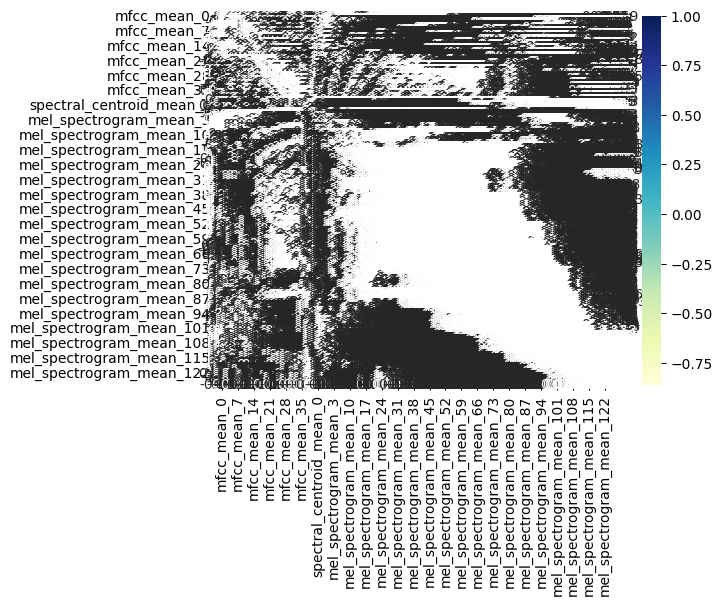

In [5]:
train_corr_matrix_uncorr = train_data_uncorr.corr(numeric_only=True)
print(train_corr_matrix_uncorr)
sns.heatmap(train_corr_matrix_uncorr, cmap="YlGnBu", annot=True)
plt.show()


In [8]:
threshold = 0.85
find_corr_train = find_highly_correlated_features(train_corr_matrix_uncorr, threshold=threshold)
print(f"Features with correlation >= {threshold} (absolute value) in training data:")
print(f"Total pairs found: {len(find_corr_train)}")
if len(find_corr_train) > 0:
    print("\nTop 20 most correlated pairs:")
    print(find_corr_train.head(200).to_string(index=False))
else:
    print("No highly correlated pairs found with this threshold.")

Features with correlation >= 0.85 (absolute value) in training data:
Total pairs found: 31

Top 20 most correlated pairs:
                feature_1                feature_2  correlation
  mel_spectrogram_mean_91  mel_spectrogram_mean_92     0.929846
 mel_spectrogram_mean_125 mel_spectrogram_mean_126     0.927114
  mel_spectrogram_mean_92  mel_spectrogram_mean_93     0.918238
  mel_spectrogram_mean_90  mel_spectrogram_mean_91     0.910949
zero_crossing_rate_mean_0 spectral_centroid_mean_0     0.903631
 mel_spectrogram_mean_124 mel_spectrogram_mean_125     0.895945
 mel_spectrogram_mean_101 mel_spectrogram_mean_102     0.884867
  mel_spectrogram_mean_81  mel_spectrogram_mean_82     0.883172
 mel_spectrogram_mean_107 mel_spectrogram_mean_108     0.878902
  mel_spectrogram_mean_80  mel_spectrogram_mean_81     0.877117
  mel_spectrogram_mean_97  mel_spectrogram_mean_98     0.871759
  mel_spectrogram_mean_96  mel_spectrogram_mean_97     0.871037
  mel_spectrogram_mean_95  mel_spectrogram_mea